In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('./data/X_train.csv')
df.head(5)

/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Id ProductId          UserId  HelpfulnessNumerator  HelpfulnessDenominator  \
0   0   5019281   ADZPIG9QOCDG5                     0                       0   
1   1   5019281  A35947ZP82G7JH                     0                       0   
2   2   5019281  A3UORV8A9D5L2E                     0                       0   
3   3   5019281  A1VKW06X1O2X7V                     0                       0   
4   4   5019281  A3R27T4HADWFFJ                     0                       0   

   Score        Time                                      Summary  \
0    4.0  2008-02-26                    good version of a classic   
1    3.0  2013-12-30                       good but not as moving   
2    3.0  2013-12-30          winklers performance was ok at best   
3    5.0  2008-02-13  its an enjoyable twist on the classic story   
4    4.0  2013-12-22                             best scrooge yet   

                                                Text  Helpfulness  ...  \
0  charming version classic dickens tale henry wi...          0.0  ...   
1  good emotionally moving christmas carol dicken...          0.0  ...   
2  dont get wrong winkler wonderful character act...          0.0  ...   
3  henry winkler good twist classic story convent...          0.0  ...   
4  one best scrooge movies henry winkler outdoes ...          0.0  ...   

     lsa491    lsa492    lsa493    lsa494    lsa495    lsa496    lsa497  \
0 -0.008498 -0.000365 -0.009901  0.011573 -0.002078 -0.017503  0.009678   
1 -0.017891 -0.019765 -0.008595  0.001449  0.000434  0.004874  0.020533   
2  0.001055  0.009260 -0.014075  0.004247 -0.003727 -0.000940  0.023312   
3  0.023897 -0.001171 -0.035758  0.023172 -0.001805 -0.000847  0.011177   
4  0.027197  0.015194  0.019925  0.003684  0.013529  0.012525  0.005395   

     lsa498    lsa499    lsa500  
0  0.022193  0.018614 -0.022880  
1  0.028719 -0.027713  0.011692  
2 -0.011463  0.000553 -0.016740  
3 -0.021186 -0.009085  0.020521  
4  0.010140 -0.001514  0.003367  

[5 rows x 521 columns]

**Cleaning Outliers** 

In [5]:
df.describe().round(0)

Id  HelpfulnessNumerator  HelpfulnessDenominator      Score  \
count  1397533.0             1397533.0               1397533.0  1397533.0   
mean    849004.0                   4.0                     5.0        4.0   
std     490198.0                  18.0                    21.0        1.0   
min          0.0                   0.0                     0.0        1.0   
25%     424602.0                   0.0                     0.0        4.0   
50%     849191.0                   1.0                     1.0        5.0   
75%    1273606.0                   3.0                     5.0        5.0   
max    1697532.0                6084.0                  6510.0        5.0   

       Helpfulness  Prod_label  User_label     temp_s  stopwords  punctuation  \
count    1397533.0   1397533.0   1397533.0  1397533.0  1397533.0    1397533.0   
mean           0.0     23074.0     41347.0        4.0       66.0         30.0   
std            0.0     15854.0     36760.0        1.0       85.0         44.0   
min            0.0         0.0         0.0        1.0        0.0          0.0   
25%            0.0      8648.0      8060.0        4.0       14.0          6.0   
50%            0.0     21604.0     30372.0        5.0       35.0         15.0   
75%            1.0     38154.0     69700.0        5.0       85.0         37.0   
max            8.0     50051.0    123959.0        5.0     2693.0       4836.0   

       ...      lsa91      lsa92      lsa93      lsa94      lsa95      lsa96  \
count  ...  1397533.0  1397533.0  1397533.0  1397533.0  1397533.0  1397533.0   
mean   ...       -0.0        0.0       -0.0       -0.0       -0.0       -0.0   
std    ...        0.0        0.0        0.0        0.0        0.0        0.0   
min    ...       -0.0       -0.0       -0.0       -0.0       -0.0       -0.0   
25%    ...       -0.0       -0.0       -0.0       -0.0       -0.0       -0.0   
50%    ...        0.0        0.0        0.0       -0.0       -0.0       -0.0   
75%    ...        0.0        0.0        0.0        0.0        0.0        0.0   
max    ...        0.0        0.0        0.0        0.0        0.0        0.0   

           lsa97      lsa98      lsa99     lsa100  
count  1397533.0  1397533.0  1397533.0  1397533.0  
mean         0.0        0.0        0.0       -0.0  
std          0.0        0.0        0.0        0.0  
min         -0.0       -0.0       -0.0       -0.0  
25%         -0.0       -0.0       -0.0       -0.0  
50%          0.0        0.0       -0.0       -0.0  
75%          0.0        0.0        0.0        0.0  
max          0.0        0.0        0.0        0.0  

[8 rows x 116 columns]

As we can see from here, there are lots of outliers here. Let's check distribution of each feature and clean outliers.

###Distribution of HelpfulnessNumerator

From the describe, we can see that there is a huge different third quantile value and max value.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

Matplotlib is building the font cache; this may take a moment.


/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HelpfulnessNumerator', ylabel='Density'>

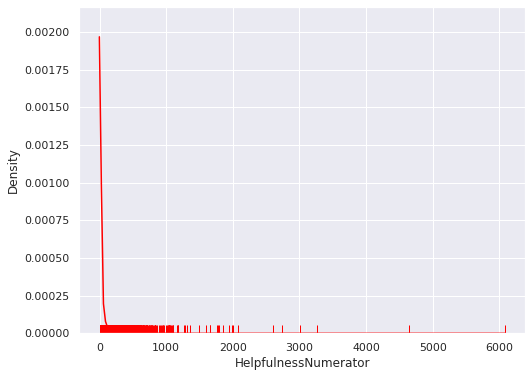

In [7]:
plt.figure(figsize=(8, 6))
sns.distplot(df.HelpfulnessNumerator, rug=True, hist=False, color = 'red')


The density plot also show that there are outliers values. We need to keep in mind that 3rd quantile value for this feature is 2. We can see there are is a huge gap between max HelpfulnessNumerator value and the value at 75%. (3rd quantile)

In [8]:
df.loc[df.HelpfulnessNumerator >= 450].Text.head(50).tolist()

['updated extraordinary film become extraordinary bluray david leans desert epic film enigmatic british officer te lawrence successes struggles arab countries early century remains sadly relevant ever regarding western worlds unending struggles middle east regions oscarwinning classic landmark event film history set high standard epic filmmaking acting making bluray film restoration well director lean thenunknown actor peter otooles contribution film remain influential five decades since films initial release efforts restorers robert harris jim painten discovered films original negative inside crushed rusting film cans columbias vaults proceeded restore original glory would pleasure holding bluray hands bluray exclusive corresponding dvd available blurays plus cd soundtrack box set result multiyear efforts part best professionals film businessthe aforementioned restoration harris painten completed yielding directors cut basis bluray release running time sometimes indicated minutes runn

As we can see here, there serious number of repetitions in reviews. There are lots of same reviews. There is something wrong with these reviews. Therefore, I will drop reviews that has HelpfulnessNumerator is bigger than 100. 

In [9]:
df.loc[df.HelpfulnessNumerator >= 500].Text.head(50)

10451     really heard putting favorite christmas film d...
32770     bluray update thenovember twodisc bluray editi...
34933     assuming filmmaker cant go indefinately lets s...
50069     remember seeing movie years ago summer living ...
64450     mpi home video made terrific decision combinin...
74023     due rerelease december motion picture one fine...
110068    like baby boomers watched film dozens times pa...
110479    critized foisting following review dvd set rev...
131338    memo george lucas buying movies give us remast...
141074    ok let get straight made documentary al gore g...
142066    watching movie friends spent next hours discus...
142286    love rules happens least expect often dont wan...
142638    plays like cross melrose place original galact...
142990    first want make clear reviewing dvd original f...
144010    went see movie tonight mentally handicapped fr...
145325    v vendetta going confuse lot people neverthele...
150961    generally dont cry movies love

In [10]:
df = df.loc[df.HelpfulnessNumerator <= 100] 

###Distribution of HelpfulnessDenominator

HelpfulnessDenominator is another feature that has extreme values.

Let's see the distribution of the HelpfulnessDenominator values by using density plot.

/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HelpfulnessDenominator', ylabel='Density'>

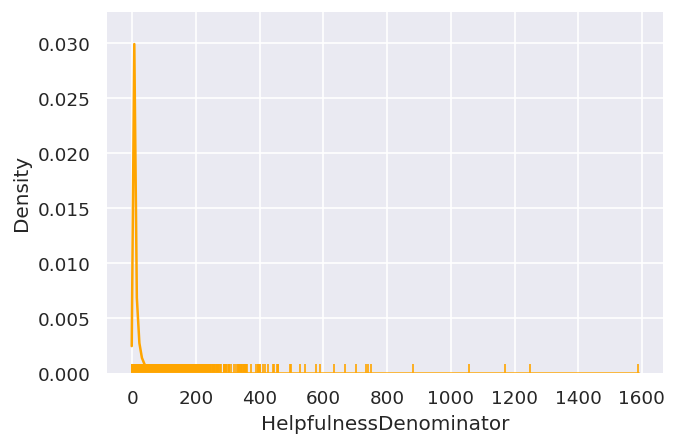

In [11]:
from matplotlib.pyplot import figure
from matplotlib.pyplot import figure
#figure(num=None, figsize=(8, 6), dpi=100)
figure(dpi=120)
sns.distplot(df.HelpfulnessDenominator, rug=True, hist=False, color = 'orange')

By looking at this plot and considering 3rd quantile value, which is 2, we can choose 10 as cut-off point for HelpfulnessDenominator feature. 

Let's take a look at values bigger than 400.

In [12]:
df.loc[df.HelpfulnessDenominator >= 100].Text.shape[0]

1766

In [13]:
#Let's check values bigger 100
df.loc[df.HelpfulnessDenominator >= 100].Text.head(50).tolist()

['passion finally made screen buyoed countless churchgroups bought advance tickets praise movie havent seen tough critique work nonreligious standpoint sure mere existence hollywoodmovie must appeal christians religious people general seems finally taken seriously liberal hollywoodbut lets look movie clocking seems plus reality bit hours movie proved gory laden effects non cg kind frankly empty movie drags time job desensitive gorefest unseen since latest wes craven flick argue story based historic truth complete fiction regardless borrows horror movies much much enjoyable bible movies zifferelis christ old standby ben hur thats comes end movie pointless unless want use evangelical tool found boring frankly enjoyable realizing happy kind enjoyment gibson going anyway movies depiction jews seem beg pilatus jesus murder lot seems plausible considering wasnt nice guy present pales background whole movie apart sensitive jews gibson could sensitive poor moviegoers generali say applaud gibso

As we can see, there are still a lot of repetition of the same reviews. We can easily say that there are something wromg with these reviews. Therefore, I will reviews which are HelpfulnessDenominator >= 100. Keep in mind that 3rd quantile value is 2 for this feature. Keeping until 100 is still not a big chop off.

In [14]:
df= df.loc[df.HelpfulnessDenominator <= 100]

###Distribution of stopwords values


/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='stopwords', ylabel='Density'>

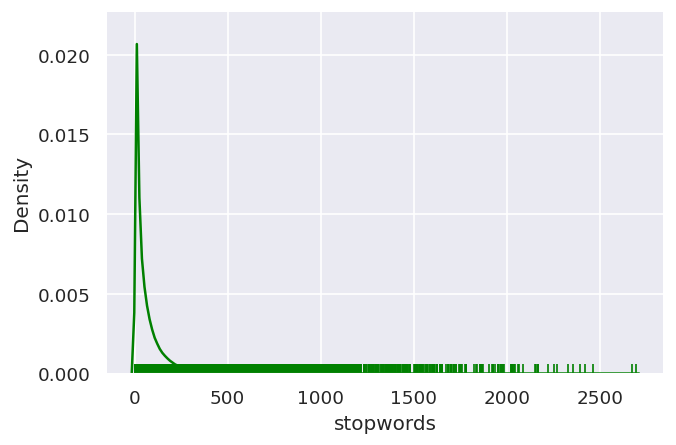

In [15]:
figure(dpi= 120)
sns.distplot(df.stopwords, rug=True, hist=False, color = 'green')

In [16]:
df.loc[df.stopwords >= 900].Text

527        way movie one begins wonder hard fuss fact unl...
4112       well one main character movie another reason m...
4406       german filmmaker screenwriter wolfgang peterse...
13682      guns navarone bluray region free uk release ac...
20364      federico fellini legendary italian filmmaker s...
                                 ...                        
1392915    hes one controversial wrestlers history action...
1396092    must admit upon first walking theatre berandal...
1396692    filmwhat say science fictionaction film someho...
1396909    incredible art always imperfection art even wo...
1397140    warning review chock full spoilers even going ...
Name: Text, Length: 616, dtype: object

For stopwords feaure, 40 is the third quantile value. So, let's check the values over 500

In [17]:
df.loc[df.stopwords >= 600].Text

527        way movie one begins wonder hard fuss fact unl...
1138       mel gibsons lethal jesus seems vivid symbol ex...
3533       one greatest dramatic series time upstairs dow...
4009       close encounters third kind limited edition st...
4112       well one main character movie another reason m...
                                 ...                        
1397103    face two groups fans go see new film based hit...
1397140    warning review chock full spoilers even going ...
1397158    warning spoilerswell quite since done big revi...
1397170    kid spent lot time movies heck adult spend lot...
1397418    written directed jon favreau stars title role ...
Name: Text, Length: 2675, dtype: object

By looking at these results, we can see that there are duplicate reviews. And, number of stopwords bigger than 600 can safely be considered as outliers because 3rd quantile for this feauture is 40. Therefore, stopwords > 600 will be dropped.

In [18]:
df = df.loc[df.stopwords <= 600]

### Distribution of 'punctuation'


<AxesSubplot:xlabel='punctuation', ylabel='Density'>

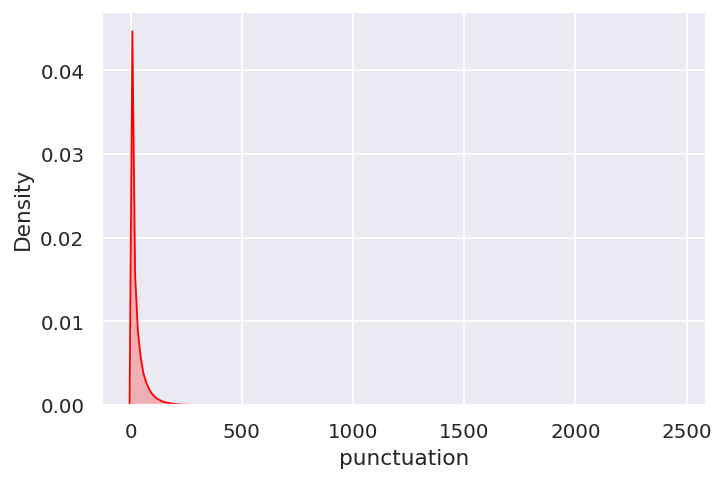

In [19]:
figure(dpi= 130)
sns.kdeplot(df.punctuation,shade=True, color = 'red')

In [20]:
# It looks after 1000, we don't see much values. Let's check those reviews
df.loc[df.punctuation >= 1000].Text.tolist()

['magnolia quite film though could find fault almost impressive monumental attack kind like mosaic lot interrelated characters intertwined stories keep interest keep us waiting see connect story threads tied togetherbut others end ambiguously promised epiphany never deliveredand yet forced applaud andersons bravado spunk panache think title magnolia meant imply various sundry story lines like petals flower seems like whenever different room always pictures flowers wall title magnolia refers magnolia blvd los angeles much magnolia takes place similar term charles fort referenced many times film coined hypothetical place things fall sky originate magoniaquiz kid donnie smith ever struck lightning hurtsthe mosaic flower petal structure kind like oscar winning crashbut least crash could argued unifying theme racism racial tensions los angeles tie together magnolia kind thesis strange coincidences happen life movie wouldnt believe perhaps could summed truth stranger fiction except hard see 

In [21]:
# Let's check reviews punctuation > 700
df.loc[df.punctuation >= 700].Text.tolist()

['director paul verhoeven freely admits didnt read starship troopers doubt screenwriter edward neumeier read either verhoeven read first chapters couldnt bear message book military service duty owe society arent willing fight freedom dont deserve military discipline praised heinleins book almost sacred rite passage verhoevens childhood experiences immediately following second world war first german occupation american occupation gave vastly different take military nazi propaganda hitler used get soldiers enlisthe wanted make different movie know robert heinlein fans disappointed perhaps someone make novel stranger strange land movie someday looking films made heinleins books puppet masters made movie title made movie called brain eaters project moonbase destination moon made phillip k dick total recall directed verhoeven blade runner minority report scanner darkly made films ever captured author various levels humor philosophy forth screen scanner darkly comes close phillip k dick capa

It looks like we are not getting more duplicates at this threshold. Therefore, I will choose 700 as cut-off point for 'punctuation' feature. 

In [22]:
df = df.loc[df.punctuation <= 700]

Let's take a look how the distribution of the punction looks like after dropping outliers:

<AxesSubplot:xlabel='punctuation', ylabel='Density'>

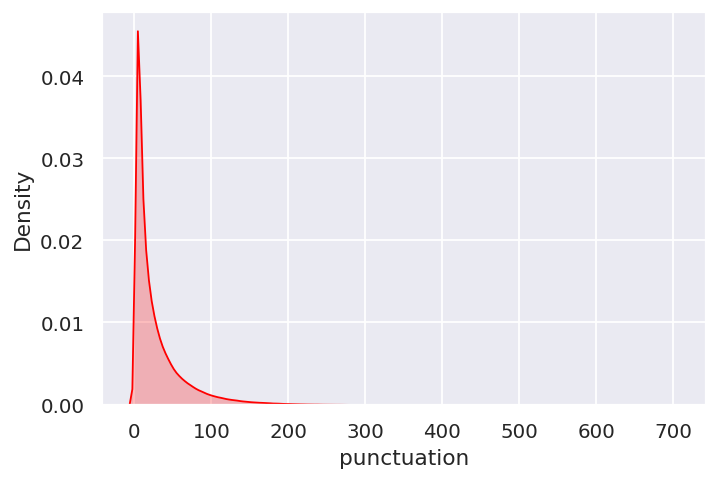

In [23]:
figure(dpi= 130)
sns.kdeplot(df.punctuation,shade=True, color = 'red')

In [24]:
#Let's check the reviews again
df.loc[df.punctuation >= 500].Text.tolist()

['first televised nbctv sunday december usually associated cbstv due networks many airings program throughout succeeding years animated color tv special rednosed turned forty years age writing endured years annual staple many american homesthe dvd edition reviewing one issued books family version provides goodlooking full frame video image perennial christmas special dolby digital soundtrack recorded original monothis particular version quite unique actually version tv special aired originally means one song routinely cut subsequent broadcasts program presented uncut within dvd version song couple sung rudolph dentisttobe near beginning show song replaced song insteadthe alternate song used scene included however separate bonus feature dvd tell truth prefer number original tune see producers special decided make switch second broadcast program better ditty imo obviously others thought well hence substitutionthis dvd contains complete uncut version total run time minutes seconds signifi

We still have lots of duplicate reviews. I will assume there exactly same reviews are problematic and bad data. I will drop all exactly same reviews. 

On the other hand, we need to keep mind that short reviews can be same coincidentally. For example, if there are just a couple word reviews, they have higher chance to be exactly same. We don't want to drop them if there are a lot reviews like this. Therefore, let's check the number of reviews that have 3 and lower number of words.

In [25]:
df.loc[df.word_count <=3].Text

304                 kids love movie
338        classic movie incredible
1053                 great picsound
1284                    great movie
1383                           good
                     ...           
1396991                 poorly done
1397032      honestly amateur bulls
1397070         item exactly stated
1397071         great classic movie
1397493        whens blurays coming
Name: Text, Length: 3887, dtype: object

In [26]:
list(df)

['Id',
 'ProductId',
 'UserId',
 'HelpfulnessNumerator',
 'HelpfulnessDenominator',
 'Score',
 'Time',
 'Summary',
 'Text',
 'Helpfulness',
 'Prod_label',
 'User_label',
 'temp_s',
 'stopwords',
 'punctuation',
 'hastags',
 'numerics',
 'upper',
 'word_count',
 'char_count',
 'avg_word',
 'lsa1',
 'lsa2',
 'lsa3',
 'lsa4',
 'lsa5',
 'lsa6',
 'lsa7',
 'lsa8',
 'lsa9',
 'lsa10',
 'lsa11',
 'lsa12',
 'lsa13',
 'lsa14',
 'lsa15',
 'lsa16',
 'lsa17',
 'lsa18',
 'lsa19',
 'lsa20',
 'lsa21',
 'lsa22',
 'lsa23',
 'lsa24',
 'lsa25',
 'lsa26',
 'lsa27',
 'lsa28',
 'lsa29',
 'lsa30',
 'lsa31',
 'lsa32',
 'lsa33',
 'lsa34',
 'lsa35',
 'lsa36',
 'lsa37',
 'lsa38',
 'lsa39',
 'lsa40',
 'lsa41',
 'lsa42',
 'lsa43',
 'lsa44',
 'lsa45',
 'lsa46',
 'lsa47',
 'lsa48',
 'lsa49',
 'lsa50',
 'lsa51',
 'lsa52',
 'lsa53',
 'lsa54',
 'lsa55',
 'lsa56',
 'lsa57',
 'lsa58',
 'lsa59',
 'lsa60',
 'lsa61',
 'lsa62',
 'lsa63',
 'lsa64',
 'lsa65',
 'lsa66',
 'lsa67',
 'lsa68',
 'lsa69',
 'lsa70',
 'lsa71',
 'lsa72',


As we can see here, none of them are exactly same reviews. So, if we drop exactly same reviews from the dataset, short reviews will not be affected. 

In [27]:
df= df.drop_duplicates(subset=['Text'])

In [28]:
#We have 567950 rows before dropping duplicates. Now:
df.shape

(1385765, 121)

In [29]:
#Let's check high number of punctuation reviews again.
df.loc[df.punctuation >= 500].Text.shape

(183,)

In [30]:
df.loc[df.punctuation >= 500].Text.tolist()

['first televised nbctv sunday december usually associated cbstv due networks many airings program throughout succeeding years animated color tv special rednosed turned forty years age writing endured years annual staple many american homesthe dvd edition reviewing one issued books family version provides goodlooking full frame video image perennial christmas special dolby digital soundtrack recorded original monothis particular version quite unique actually version tv special aired originally means one song routinely cut subsequent broadcasts program presented uncut within dvd version song couple sung rudolph dentisttobe near beginning show song replaced song insteadthe alternate song used scene included however separate bonus feature dvd tell truth prefer number original tune see producers special decided make switch second broadcast program better ditty imo obviously others thought well hence substitutionthis dvd contains complete uncut version total run time minutes seconds signifi

In here, there are still so similar reviews. Their ending has slightly different wordings. That's why there are still in the dataset even after dropping duplicates. For now, I will tolerate those reviews.

### Distribution of 'hastags' values

<Figure size 780x520 with 0 Axes>

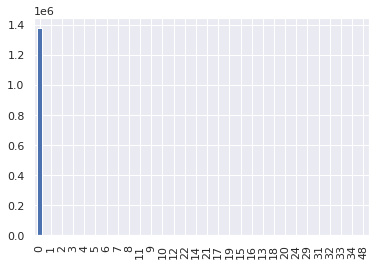

<Figure size 780x520 with 0 Axes>

In [31]:
df.hastags.value_counts().plot(kind= 'bar')
figure(dpi= 130)

In [32]:
df.loc[df.hastags >= 1].Text.shape

(6630,)

As we can see from the bar graph, hastags can be dropped because dominant portion of the reviews have no hastag.

In [33]:
df= df.drop('hastags', axis=1)

Distribution of 'numerics'

<Figure size 1440x720 with 0 Axes>

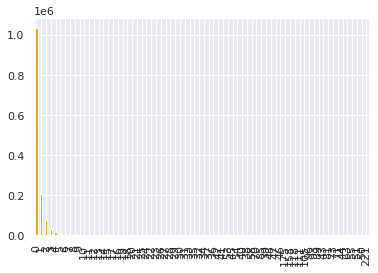

<Figure size 1440x720 with 0 Axes>

In [34]:
df.numerics.value_counts().plot(kind= 'bar', color= 'orange')
figure(figsize= (20,10))

#####By looking at this plot, we see that most of the reviews have 5 or less numerics. 
Let's check reviews that have higher than 20 numerics:

In [35]:
df.loc[df.numerics >=20].Text.shape

(868,)

### Distribution of 'upper' values



> Upper stands for number of upper case character

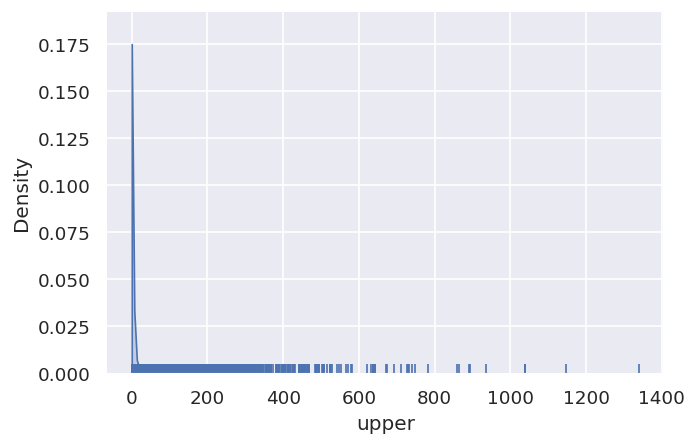

In [37]:
figure(dpi= 120)
sns.kdeplot(df.upper, shade=True, cut=0)
sns.rugplot(df.upper);

#####Let's take a look at reviews that have higher than 250 upper case characters

In [39]:
df.describe()

Id  HelpfulnessNumerator  HelpfulnessDenominator  \
count  1.385765e+06          1.385765e+06            1.385765e+06   
mean   8.484853e+05          2.863734e+00            4.436005e+00   
std    4.902348e+05          7.149530e+00            9.284416e+00   
min    0.000000e+00          0.000000e+00            0.000000e+00   
25%    4.240150e+05          0.000000e+00            0.000000e+00   
50%    8.481920e+05          1.000000e+00            1.000000e+00   
75%    1.273203e+06          3.000000e+00            4.000000e+00   
max    1.697532e+06          9.900000e+01            1.000000e+02   

              Score   Helpfulness    Prod_label    User_label        temp_s  \
count  1.385765e+06  1.385765e+06  1.385765e+06  1.385765e+06  1.385765e+06   
mean   4.111785e+00  3.977396e-01  2.305708e+04  4.140678e+04  4.111785e+00   
std    1.195296e+00  4.190602e-01  1.585513e+04  3.675680e+04  1.195296e+00   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00   
25%    4.000000e+00  0.000000e+00  8.617000e+03  8.093000e+03  4.000000e+00   
50%    5.000000e+00  2.692308e-01  2.156100e+04  3.047900e+04  5.000000e+00   
75%    5.000000e+00  8.571429e-01  3.813400e+04  6.978800e+04  5.000000e+00   
max    5.000000e+00  8.000000e+00  5.005100e+04  1.239590e+05  5.000000e+00   

          stopwords   punctuation  ...         lsa91         lsa92  \
count  1.385765e+06  1.385765e+06  ...  1.385765e+06  1.385765e+06   
mean   6.429666e+01  2.874246e+01  ... -1.764559e-04  1.061834e-05   
std    7.692688e+01  3.809403e+01  ...  2.623938e-02  2.621519e-02   
min    0.000000e+00  0.000000e+00  ... -2.679864e-01 -2.266284e-01   
25%    1.400000e+01  6.000000e+00  ... -1.447719e-02 -1.420885e-02   
50%    3.500000e+01  1.500000e+01  ...  1.189111e-04  6.497213e-05   
75%    8.400000e+01  3.700000e+01  ...  1.456990e-02  1.398267e-02   
max    6.000000e+02  7.000000e+02  ...  3.006029e-01  2.715025e-01   

              lsa93         lsa94         lsa95         lsa96         lsa97  \
count  1.385765e+06  1.385765e+06  1.385765e+06  1.385765e+06  1.385765e+06   
mean  -3.241754e-05 -2.344812e-04 -4.057964e-05 -7.958472e-05  1.710588e-04   
std    2.608079e-02  2.601386e-02  2.588709e-02  2.577716e-02  2.575505e-02   
min   -2.633266e-01 -1.933096e-01 -2.121676e-01 -2.515548e-01 -2.199776e-01   
25%   -1.364485e-02 -1.512003e-02 -1.444266e-02 -1.433654e-02 -1.422724e-02   
50%    5.957657e-04 -9.483930e-04 -6.530601e-04 -1.627198e-04  5.809988e-04   
75%    1.420597e-02  1.378018e-02  1.355033e-02  1.392911e-02  1.493827e-02   
max    2.839121e-01  2.569484e-01  2.841883e-01  2.316518e-01  2.368212e-01   

              lsa98         lsa99        lsa100  
count  1.385765e+06  1.385765e+06  1.385765e+06  
mean   3.263840e-04  6.029030e-05 -6.844045e-05  
std    2.568911e-02  2.554679e-02  2.533804e-02  
min   -2.251464e-01 -2.122261e-01 -1.946475e-01  
25%   -1.373534e-02 -1.394875e-02 -1.436356e-02  
50%    2.882881e-04 -4.116565e-04 -2.965905e-04  
75%    1.375887e-02  1.310654e-02  1.387354e-02  
max    3.020169e-01  2.386521e-01  2.225543e-01  

[8 rows x 115 columns]

###Distribution of word_count values

<AxesSubplot:xlabel='word_count', ylabel='Density'>

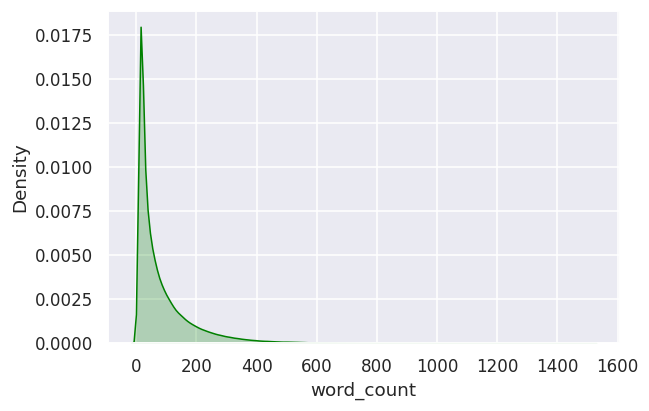

In [40]:
figure(dpi= 110)
sns.kdeplot(df.word_count,shade=True, color = 'green')

#####Let's take a look at reviews that have higher than 800 words

###Distribution of char_count values

<AxesSubplot:xlabel='char_count', ylabel='Density'>

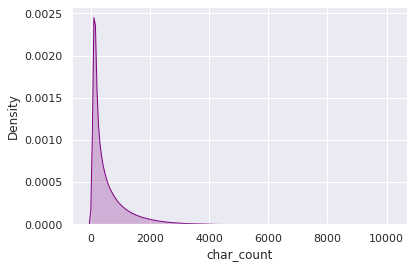

In [43]:
sns.kdeplot(df.char_count,shade=True, color = 'purple')

#####Let's take a look at reviews that have higher than 6000 characters

In [44]:
df.loc[df.char_count >= 6000].Text.shape

(272,)

In [45]:
df.loc[df.char_count >= 6000].Text.tolist()

['arguably one finest pictures confront effects war seasoned commandoes guns navarone celebrates fiftieth anniversary release finally new bluray october fortunate enough receive exclusive screener prerelease copy order complete reviewbased novel alistair maclean guns adapted screen carl foreman man responsible high noon another seminal world war ii picture bridge river kwai directed j lee thompson last minute brilliant addition crew film stars gregory peck anthony quinn david niven along host additional faces familiar era motion picturesthe guns navarone always one personal favorites excited view release bluray see picture endured restoration process much film looks amazing notable sections pronounced grain likely due condition aging negative well fact much film shot dark lighting restored audio sounds terrific director thompson deserves praise shot composition throughout picture clear went great lengths position primary secondary elements bringing story life rigorous schedule external

Again, nothing suspicious here. No reason to drop any review for now.

###Distribution of avg_word length

<AxesSubplot:xlabel='avg_word', ylabel='Density'>

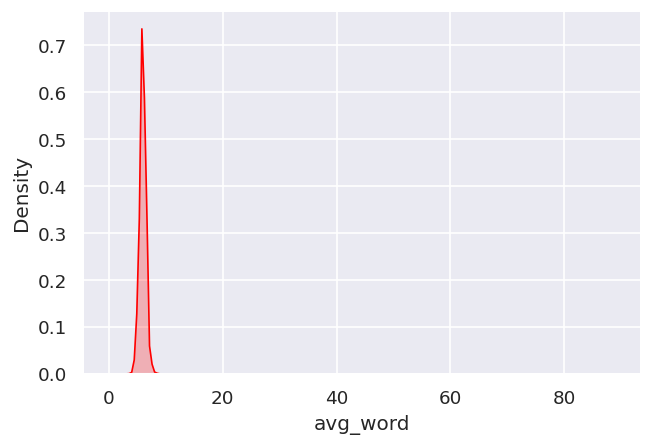

In [46]:
figure(dpi=120)
sns.kdeplot(df.avg_word,shade=True, color = 'red')

I don't have any idea how mean word length will help me in my analysis. Still, having this feature doesn't hurt the analysis.

Now, let's check latest condition of the dataset because we have dropped many values

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1385765 entries, 0 to 1397532
Columns: 120 entries, Id to lsa100
dtypes: float64(104), int64(11), object(5)
memory usage: 1.2+ GB


It looks number of the rows has become 392761 . It was 568411 before dropping duplicate values.


---



---



---



### Distribution of Scores

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

Text(0.5, 1.0, 'Distribution of Scores')

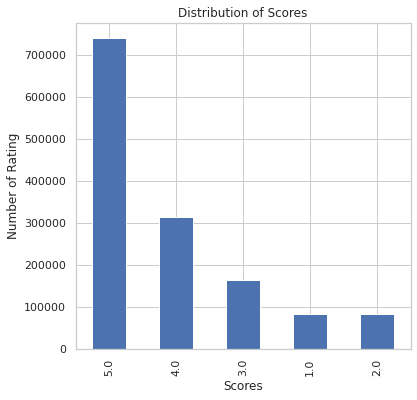

In [49]:
df.Score.value_counts(ascending = False).plot(kind= 'bar', figsize= (6,6))
plt.xlabel("Scores")
plt.ylabel('Number of Rating')
plt.title('Distribution of Scores')

Let's create the same graph in a more colorful way

Text(0.5, 1.0, 'Distribution of Scores')

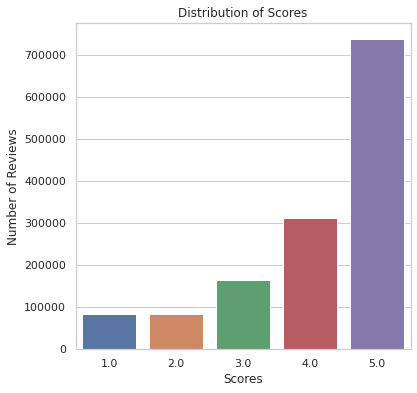

In [50]:
a = df.groupby(['Score'])['Id'].count()
a = a.reset_index()
a = a.rename(columns={'Id': 'Number of Reviews'})
fig, ax = plt.subplots(figsize=(6, 6))

sns.barplot(x='Score', y='Number of Reviews', data=a)
plt.xlabel("Scores")
plt.ylabel('Number of Reviews')
plt.title('Distribution of Scores')

Most of the reviews are 5 stars. This is an unbalanced distribution.


---



---



### Number of Characters in Reviews

In [51]:
import matplotlib.pyplot as plt
import numpy as np
sns.set(color_codes=True)

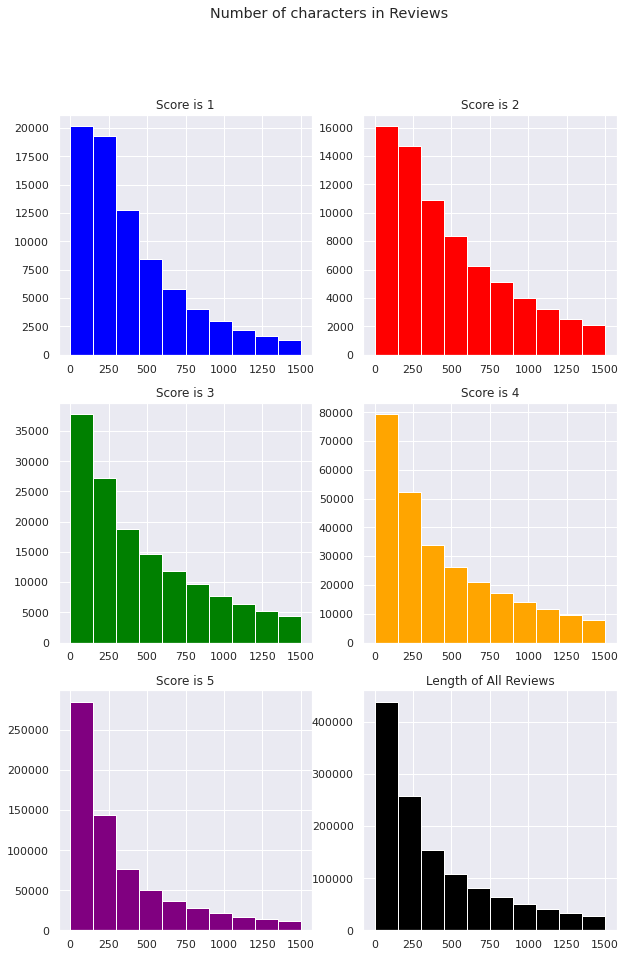

In [52]:
fig, axs = plt.subplots(3,2, figsize=(10, 15))

#Score 1
review_len = df.loc[df['Score']==1]['Text'].str.len()
axs[0,0].hist(review_len, color='blue', range=(0,1500))
axs[0,0].set_title('Score is 1')

#Score 2
review_len = df.loc[df['Score']==2]['Text'].str.len()
axs[0,1].hist(review_len, color='red',range=(0,1500))
axs[0,1].set_title('Score is 2')

#Score 3
review_len = df.loc[df['Score']==3]['Text'].str.len()
axs[1,0].hist(review_len, color='green', range=(0,1500))
axs[1,0].set_title('Score is 3')

#Score 4
review_len = df.loc[df['Score']==4]['Text'].str.len()
axs[1,1].hist(review_len, color='orange', range=(0,1500))
axs[1,1].set_title('Score is 4')


#Score 5
review_len = df.loc[df['Score']==5]['Text'].str.len()
axs[2,0].hist(review_len, color='purple', range=(0,1500))
axs[2,0].set_title('Score is 5')

#All Scores
review_len = df['Text'].str.len()
axs[2,1].hist(review_len, color='black', range=(0,1500))
axs[2,1].set_title('Length of All Reviews')


fig.suptitle('Number of characters in Reviews')

plt.show()

####**After this point, I will convert 'Score' to a binary feature.

*   Score values 1, 2 and 3 will be coded as 0 (zero)
*   Score values 4 and 5 will be coded as 1





In [53]:
df['Good_reviews']= df.Score
df.Good_reviews[df.Score <= 3] = 0
df.Good_reviews[df.Score >= 4] = 1

<ipython-input-53-9a065f753a12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Good_reviews[df.Score <= 3] = 0
<ipython-input-53-9a065f753a12>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Good_reviews[df.Score >= 4] = 1


Text(0.5, 1.0, 'Distribution of Good Reviews')

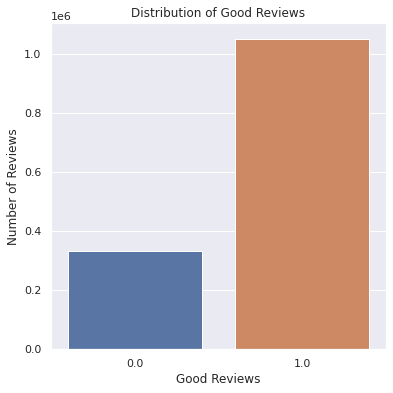

In [54]:
a = df.groupby(['Good_reviews'])['Id'].count()
a = a.reset_index()
a = a.rename(columns={'Id': 'Number of Reviews'})
fig, ax = plt.subplots(figsize=(6, 6))

sns.barplot(x='Good_reviews', y='Number of Reviews', data=a)
plt.xlabel("Good Reviews")
plt.ylabel('Number of Reviews')
plt.title('Distribution of Good Reviews')

In [55]:
df.Good_reviews.sample(10)

312103     1.0
114876     1.0
3716       1.0
786781     1.0
365919     0.0
723055     0.0
444328     1.0
367894     1.0
1240000    1.0
568464     0.0
Name: Good_reviews, dtype: float64

Distribution of Number of Words for Reviews


In [56]:
list(df)

['Id',
 'ProductId',
 'UserId',
 'HelpfulnessNumerator',
 'HelpfulnessDenominator',
 'Score',
 'Time',
 'Summary',
 'Text',
 'Helpfulness',
 'Prod_label',
 'User_label',
 'temp_s',
 'stopwords',
 'punctuation',
 'numerics',
 'upper',
 'word_count',
 'char_count',
 'avg_word',
 'lsa1',
 'lsa2',
 'lsa3',
 'lsa4',
 'lsa5',
 'lsa6',
 'lsa7',
 'lsa8',
 'lsa9',
 'lsa10',
 'lsa11',
 'lsa12',
 'lsa13',
 'lsa14',
 'lsa15',
 'lsa16',
 'lsa17',
 'lsa18',
 'lsa19',
 'lsa20',
 'lsa21',
 'lsa22',
 'lsa23',
 'lsa24',
 'lsa25',
 'lsa26',
 'lsa27',
 'lsa28',
 'lsa29',
 'lsa30',
 'lsa31',
 'lsa32',
 'lsa33',
 'lsa34',
 'lsa35',
 'lsa36',
 'lsa37',
 'lsa38',
 'lsa39',
 'lsa40',
 'lsa41',
 'lsa42',
 'lsa43',
 'lsa44',
 'lsa45',
 'lsa46',
 'lsa47',
 'lsa48',
 'lsa49',
 'lsa50',
 'lsa51',
 'lsa52',
 'lsa53',
 'lsa54',
 'lsa55',
 'lsa56',
 'lsa57',
 'lsa58',
 'lsa59',
 'lsa60',
 'lsa61',
 'lsa62',
 'lsa63',
 'lsa64',
 'lsa65',
 'lsa66',
 'lsa67',
 'lsa68',
 'lsa69',
 'lsa70',
 'lsa71',
 'lsa72',
 'lsa73',
 '

/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


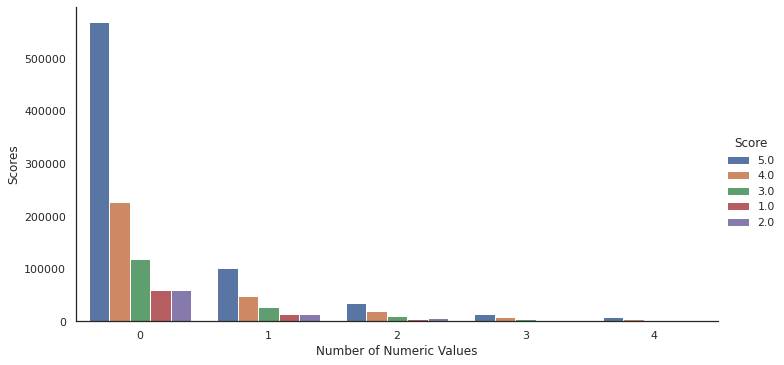

In [57]:
# Now, let's take a look at the Number of Words number for tweets

#plt.figure(figsize=(12,10), dpi= 100 )
#sns.set(font_scale=1)

with sns.axes_style('white'):
    g = sns.catplot( 'numerics', data= df.loc[df.numerics <= 4], aspect= 2, kind='count', 
                    hue='Score', hue_order=df['Score'].value_counts().sort_values(ascending=False).index)
    g.set_ylabels('Scores')
    g.set_xlabels('Number of Numeric Values')
    g.set_titles('Distrubition of Number of Numeric values for Reviews')



/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


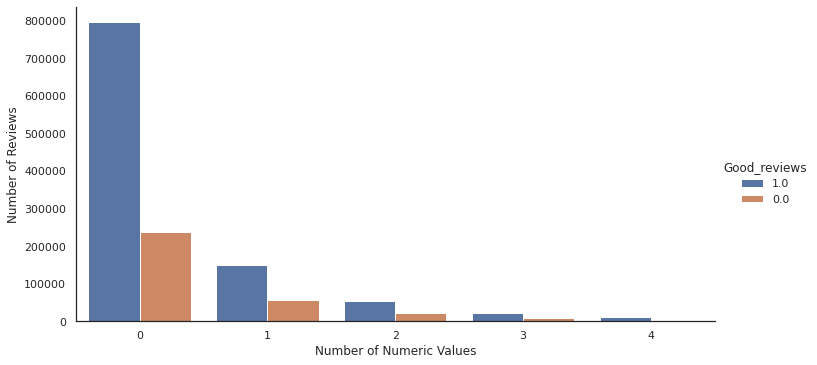

In [58]:
# Now, let's take a look at the Number of Words number for Reviews

#plt.figure(figsize=(12,10), dpi= 100 )
#sns.set(font_scale=1)

with sns.axes_style('white'):
    g = sns.catplot( 'numerics', data= df.loc[df.numerics <= 4], aspect= 2, kind='count', 
                    hue='Good_reviews', hue_order=df['Good_reviews'].value_counts().sort_values(ascending=False).index)
    g.set_ylabels('Number of Reviews')
    g.set_xlabels('Number of Numeric Values')
    g.set_titles('Distrubition of Number of Numeric values for Reviews')

/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


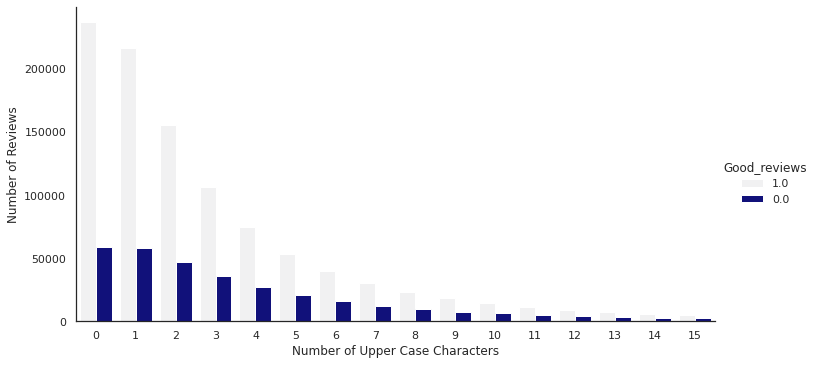

In [59]:
# Now, let's take a look at the number of upper sase characters for reviews

# I will take max upper= 20

#plt.figure(figsize=(12,10), dpi= 100 )
#sns.set(font_scale=1)

with sns.axes_style('white'):
    g = sns.catplot( 'upper', data= df.loc[df.upper <= 15], aspect= 2, kind='count', 
                    hue='Good_reviews', hue_order=df['Good_reviews'].value_counts().sort_values(ascending=False).index, color= 'DarkBlue')
    g.set_ylabels('Number of Reviews')
    g.set_xlabels('Number of Upper Case Characters')
    g.set_titles('Distrubition of Number of Upper Case Characters for Reviews')

#####Let's check  HelpfulnessNumerator vs Good_reviews 

/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


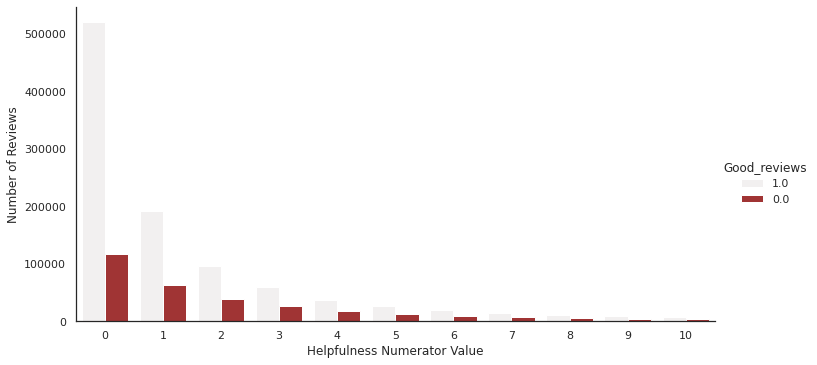

In [60]:
# Now, let's take a look at the number of upper sase characters for reviews

# I will take max upper= 20

#plt.figure(figsize=(12,10), dpi= 100 )
#sns.set(font_scale=1)

with sns.axes_style('white'):
    g = sns.catplot( 'HelpfulnessNumerator', data= df.loc[df.HelpfulnessNumerator <= 10], aspect= 2, kind='count', 
                    hue='Good_reviews', hue_order=df['Good_reviews'].value_counts().sort_values(ascending=False).index, color = 'Firebrick')
    g.set_ylabels('Number of Reviews')
    g.set_xlabels('Helpfulness Numerator Value')
    g.set_titles('Distrubition of HelpfulnessNumerator for Reviews')

/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


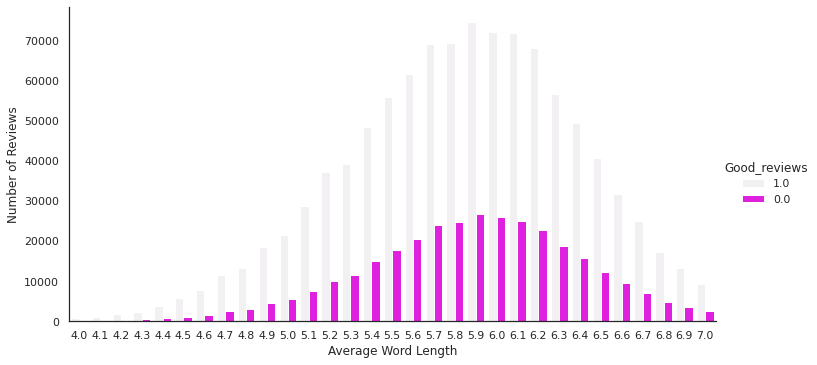

In [61]:
#Average Word Length

# Now, let's take a look at the number of upper sase characters for reviews

# I will take max upper= 20

#plt.figure(figsize=(12,10), dpi= 100 )
#sns.set(font_scale=1)

with sns.axes_style('white'):
    g = sns.catplot( 'avg_word', data= df.loc[(df.avg_word <= 7) & (df.avg_word >= 4)], aspect= 2, kind='count', 
                    hue='Good_reviews', hue_order=df['Good_reviews'].value_counts().sort_values(ascending=False).index, color = 'Magenta')
    g.set_ylabels('Number of Reviews')
    g.set_xlabels('Average Word Length')
    g.set_titles('Distrubition of HelpfulnessNumerator for Reviews')

As we can see from the plot, the distributions are normal distribution for both good and bad reviews

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1385765 entries, 0 to 1397532
Columns: 121 entries, Id to Good_reviews
dtypes: float64(105), int64(11), object(5)
memory usage: 1.3+ GB


In [5]:
df['Time']= pd.to_datetime(df.Time)

In [64]:
df.Time

0         2008-02-26
1         2013-12-30
2         2013-12-30
3         2008-02-13
4         2013-12-22
             ...    
1397527   2014-07-19
1397528   2014-07-19
1397530   2014-07-19
1397531   2014-07-22
1397532   2014-07-19
Name: Time, Length: 1385765, dtype: datetime64[ns]

Text(0.5, 1.0, 'Mean Revies Scores - Monthly')

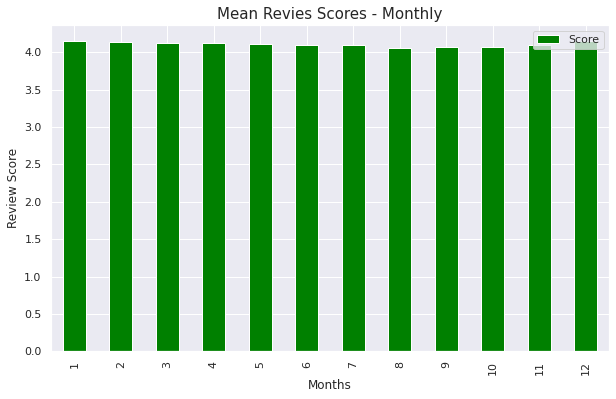

In [65]:
df[['Score']].groupby(df["Time"].dt.month).mean().plot(kind="bar", figsize= (10,6), color ='green')
plt.xlabel('Months')
plt.ylabel('Review Score')
plt.title('Mean Revies Scores - Monthly', fontsize=15)

In [6]:
df[['Heplfulness']].groupby(df["Time"].dt.month).mean().plot(kind="bar", figsize= (10,6), color ='turquoise')
plt.xlabel('Months')
plt.ylabel('Review Score')
plt.title('Mean Reviews Scores - Monthly', fontsize=15)

KeyError: "None of [Index(['Heplfulness'], dtype='object')] are in the [columns]"

As we can see here, month doesn't have a visible affect on score. All of them over 4 out of 5.

##### Let's check historic distribution of total number of scores

In [67]:
df.Score.groupby('city')([df["Time"].dt.year, df["Time"].dt.month]).count().plot(kind="bar", figsize=(26,5), color = 'mediumvioletred')
plt.xlabel('Time')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews in Time', fontsize=15)

KeyError: 'city'

In [7]:
a= df.loc[df.Time > '03-01-2005']

In [8]:
a

Id   ProductId          UserId  HelpfulnessNumerator  \
0              0     5019281   ADZPIG9QOCDG5                     0   
1              1     5019281  A35947ZP82G7JH                     0   
2              2     5019281  A3UORV8A9D5L2E                     0   
3              3     5019281  A1VKW06X1O2X7V                     0   
4              4     5019281  A3R27T4HADWFFJ                     0   
...          ...         ...             ...                   ...   
1397528  1697526  B00LT1JHLW  A22OB0DIJ5FO0G                     2   
1397529  1697529  B00LT1JHLW  A17W587EH23J0Q                    32   
1397530  1697530  B00LT1JHLW  A3DE438TF1A958                     3   
1397531  1697531  B00LT1JHLW  A2RWCXDMANY0LW                     0   
1397532  1697532  B00LT1JHLW  A3ROPC55BE2OM9                    11   

         HelpfulnessDenominator  Score       Time  \
0                             0    4.0 2008-02-26   
1                             0    3.0 2013-12-30   
2                             0    3.0 2013-12-30   
3                             0    5.0 2008-02-13   
4                             0    4.0 2013-12-22   
...                         ...    ...        ...   
1397528                      12    4.0 2014-07-19   
1397529                      48    5.0 2014-07-18   
1397530                      10    5.0 2014-07-19   
1397531                       4    5.0 2014-07-22   
1397532                      23    5.0 2014-07-19   

                                                   Summary  \
0                                good version of a classic   
1                                   good but not as moving   
2                      winklers performance was ok at best   
3              its an enjoyable twist on the classic story   
4                                         best scrooge yet   
...                                                    ...   
1397528      worth the wait but worth the asking price too   
1397529  holy batboxset batman i never thought this wou...   
1397530  prayers have been answered because batman  tv ...   
1397531                                          cant wait   
1397532  the price is insane people really need to wake...   

                                                      Text  Helpfulness  ...  \
0        charming version classic dickens tale henry wi...     0.000000  ...   
1        good emotionally moving christmas carol dicken...     0.000000  ...   
2        dont get wrong winkler wonderful character act...     0.000000  ...   
3        henry winkler good twist classic story convent...     0.000000  ...   
4        one best scrooge movies henry winkler outdoes ...     0.000000  ...   
...                                                    ...          ...  ...   
1397528  looking much forward release price bit outrage...     0.166667  ...   
1397529  finally holy grail tvondvd boxsets coming blur...     0.666667  ...   
1397530  could true dreaming batman favorite comic book...     0.300000  ...   
1397531  fan series since young boy personaly dont cons...     0.000000  ...   
1397532  people seriously need wake realize cant get bl...     0.478261  ...   

           lsa491    lsa492    lsa493    lsa494    lsa495    lsa496    lsa497  \
0       -0.008498 -0.000365 -0.009901  0.011573 -0.002078 -0.017503  0.009678   
1       -0.017891 -0.019765 -0.008595  0.001449  0.000434  0.004874  0.020533   
2        0.001055  0.009260 -0.014075  0.004247 -0.003727 -0.000940  0.023312   
3        0.023897 -0.001171 -0.035758  0.023172 -0.001805 -0.000847  0.011177   
4        0.027197  0.015194  0.019925  0.003684  0.013529  0.012525  0.005395   
...           ...       ...       ...       ...       ...       ...       ...   
1397528 -0.015998  0.008072 -0.018746 -0.003243 -0.004633  0.006452  0.010969   
1397529 -0.001621  0.014853 -0.005404  0.007141 -0.005541  0.015444 -0.002280   
1397530 -0.013204  0.013114 -0.010264 -0.003060 -0.000494  0.023514  0.029240   
1397531 -0.002582  0

In [ ]:
a.Score.groupby([df["Time"].dt.year, df["Time"].dt.month]).count().plot(kind="bar", figsize=(16,5), color = 'darkorange')
plt.xlabel('Time')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews in Time',fontsize=15)

In [ ]:
#Let's create the similar time graph for later use:
a.Score.groupby([df["Time"].dt.year, df["Time"].dt.month]).count().plot(kind="bar", figsize=(20,5), color = 'orchid')
plt.xlabel('Time')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews in Time', fontsize=15)

In [ ]:
b= df.loc[df.Time < '01-01-2005']

b.Score.groupby([df["Time"].dt.year, df["Time"].dt.month]).count().plot(kind="bar", figsize=(12,5), color = 'orchid')
plt.xlabel('Time')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews in Between 1999 and 2005',fontsize=15)

Let's create this same plot with different tool

In [ ]:
!pip install plotly

In [ ]:
import plotly.graph_objects as go
import datetime

fig = go.Figure(data=[go.Bar(y =df.Score.groupby([df["Time"].dt.year, df["Time"].dt.month]).count())])
fig.update_layout(title_text='Time Series for Total Number of Scores with Rangeslider',
                  xaxis_rangeslider_visible=True)

##### Time Series for Mean Score with Rangeslider

In [ ]:
import plotly.graph_objects as go
import datetime

fig = go.Figure(data=[go.Bar(y =df.Score.groupby([df["Time"].dt.year, df["Time"].dt.month]).mean())])
fig.update_layout(title_text='Time Series for Average Score with Rangeslider',
                  xaxis_rangeslider_visible=True)

##### Mean of the Scores over the time

In [ ]:
df.Score.groupby([df["Time"].dt.year, df["Time"].dt.month]).mean().plot(kind="bar", figsize=(25,5), color = 'magenta')
plt.xlabel('Time', fontsize=13)
plt.ylabel('Average Score of Reviews', fontsize=13)
plt.title('Average Score of Reviews in Time', fontsize=15)

It looks like something happened in (2005,05) and mean of the reviews never saw the value of 5 after this date.

In [ ]:
#Same graph for Good_reviews feature

df.Good_reviews.groupby([df["Time"].dt.year, df["Time"].dt.month]).mean().plot(kind="bar", figsize=(25,5), color = 'Darkorchid')
plt.xlabel('Time', fontsize=13)
plt.ylabel('Average of Good Reviews', fontsize=13)
plt.title('Average Good Review Distribution of Reviews in Time', fontsize=15)

In [ ]:
a.Good_reviews.groupby([df["Time"].dt.year, df["Time"].dt.month]).mean().plot(kind="bar", figsize=(15,5), color = 'Darkorchid')
plt.xlabel('Time', fontsize=13)
plt.ylabel('Average of Good Reviews', fontsize=13)
plt.title('Average Good Review Distribution of Reviews in Time', fontsize=15)

In [ ]:
a.Good_reviews.groupby([df["Time"].dt.year, df["Time"].dt.month]).size().plot(kind="bar", figsize=(15,5), color = 'Darkorchid')
plt.xlabel('Time', fontsize=13)
plt.ylabel('Average of Good Reviews', fontsize=13)
plt.title('Average Good Review Distribution of Reviews in Time', fontsize=15)

##### Let's take a look at pair plot

In [ ]:
#sns.pairplot(df)

In [ ]:
df.to_csv('Amazon_reviews_cleaned_finalform.csv', index=False)

In [ ]:
!pip install -q wordcloud
import wordcloud
from nltk.corpus import stopwords
import nltk
import string
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
stop = stopwords.words('english')

In [72]:
#Libraries for visualization
from nltk.corpus import stopwords
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

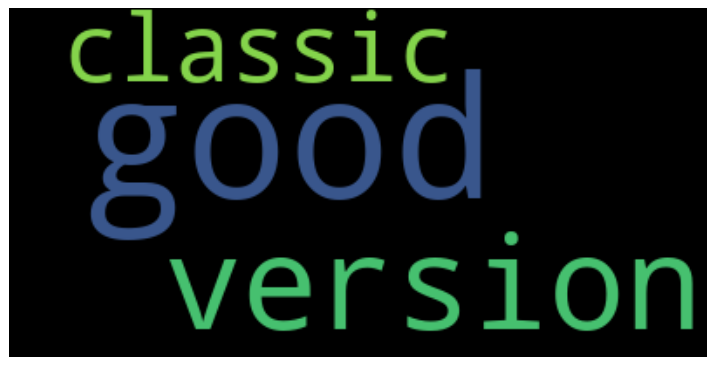

In [73]:
# Start with one review:
abc = df.Text[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(abc)

# Display the generated image:
figure(figsize= (10,10), dpi= 90)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df['Text']= df['Text'].astype(str)

In [75]:
#Word cloud for the all reviews
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text_for_cloud = " ".join(x for x in df.Text)
print ("There are {} words in the combination of all reviews.".format(len(text_for_cloud)))

There are 22851061 words in the combination of all reviews.


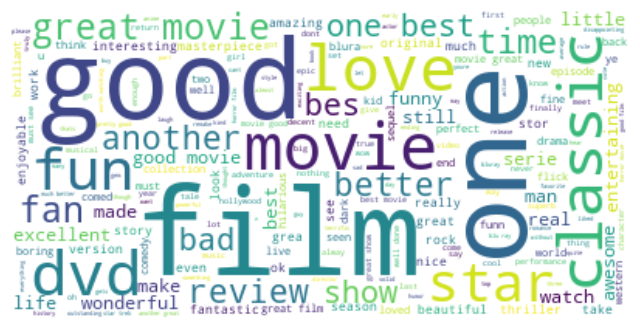

In [76]:
# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_for_cloud)

# Display the generated image:
# the matplotlib way:
figure(figsize= (8,8), dpi= 100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

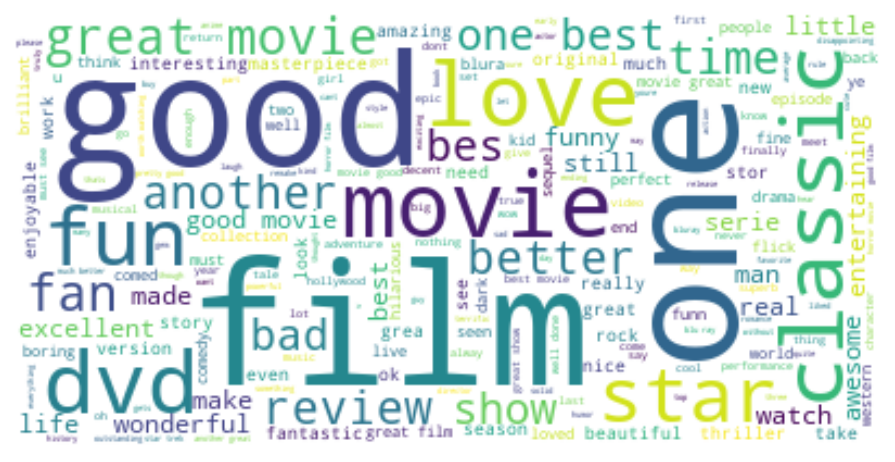

In [77]:
# Let's increase the dpi:
figure(figsize= (8,8), dpi= 140)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

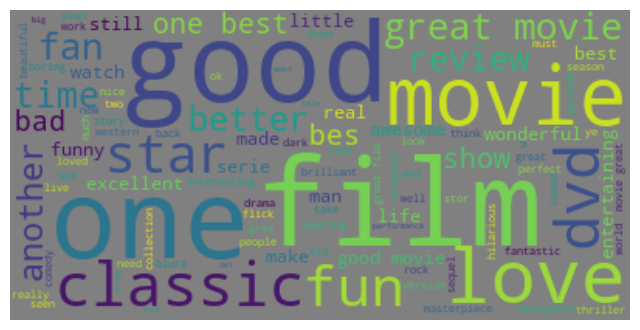

In [78]:
wordcloud = WordCloud(stopwords=stopwords, background_color="grey", max_words= 100).generate(text_for_cloud)

# Display the generated image:
# the matplotlib way:
figure(figsize= (8,8), dpi= 100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
freq = pd.Series(' '.join(df['Text']).split()).value_counts()[:20]
freq